##### <p> Samuel Wolfe <br> July 30, 2023 <br> MSBA 206 <br> DMBA Chapter 9a</p>

In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import requests
import io
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import scikitplot as skplt
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary,liftChart

In [3]:
def readFile(url):
    download = requests.get(url).content
    # Reading the downloaded content and turning it into a pandas dataframe
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    return df
def statslist(df):
    dfStats = pd.DataFrame({'Mean' : df.mean(numeric_only=True),
            'SD' : df.std(numeric_only=True),
            'Min' : df.min(),
            'Max' : df.max(),
            'Median' : df.median(numeric_only=True),
            })
    return dfStats
def categorize(df):
    for x in df:
        df[x] = df[x].astype('category')
    return df
def catStringToINT(df,col):
    names = []
    num = []
    for x in df[col].unique():
        names.append((df[col] == x))
    for x in range(len(names)):
        num.append(x+1)
    df[col] = np.select(names, num)
    return df

In [33]:
dfeBay = readFile("https://raw.githubusercontent.com/wolfesamk/MSBA-206/main/dmba/eBayAuctions.csv")

In [5]:
dfeBay

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


In [6]:
outcome = 'Competitive'

In [7]:
dfeBay['Category'] = dfeBay['Category'].replace('/','_', regex=True)
dfeBay['Category'] = dfeBay['Category'].replace(' ','', regex=True)
dfeBay = dfeBay.rename(columns={'Competitive?': outcome})

In [8]:
dfeBay['Duration'] = dfeBay['Duration'].astype('category')
dfeBay['endDay'] = dfeBay['endDay'].astype('category')
dfeBay['currency'] = dfeBay['currency'].astype('category')
dfeBay['Category'] = dfeBay['Category'].astype('category')

In [9]:
dfeBay.head(5)

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive
0,Music_Movie_Game,US,3249,5,Mon,0.01,0.01,0
1,Music_Movie_Game,US,3249,5,Mon,0.01,0.01,0
2,Music_Movie_Game,US,3249,5,Mon,0.01,0.01,0
3,Music_Movie_Game,US,3249,5,Mon,0.01,0.01,0
4,Music_Movie_Game,US,3249,5,Mon,0.01,0.01,0


In [10]:
dfeBay = pd.get_dummies(dfeBay)

In [11]:
truths = [(dfeBay['Competitive'] == 1),
          (dfeBay['Competitive'] == 0)]
meanings = ['Yes', 'No']
dfeBay[outcome] = np.select(truths,meanings)
dfeBay[outcome].value_counts()

Competitive
Yes    1066
No      906
Name: count, dtype: int64

In [12]:
dfeBay.head(5)

,sellerRating,ClosePrice,OpenPrice,Competitive,Category_Antique_Art_Craft,Category_Automotive,Category_Books,Category_Business_Industrial,Category_Clothing_Accessories,Category_Coins_Stamps,...,Duration_5,Duration_7,Duration_10,endDay_Fri,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed
0,3249,0.01,0.01,No,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,3249,0.01,0.01,No,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,3249,0.01,0.01,No,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,3249,0.01,0.01,No,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,3249,0.01,0.01,No,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [13]:
X_eBay = dfeBay.drop(columns=outcome)
Y_eBay = dfeBay[outcome]
X_train, X_valid, y_train, y_valid = train_test_split(X_eBay, Y_eBay, test_size=0.4, random_state=1)

In [14]:
classTree = DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=7, min_samples_split=50)
classTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=1)

## 9.1.a Printed Tree

Classes: No, Yes


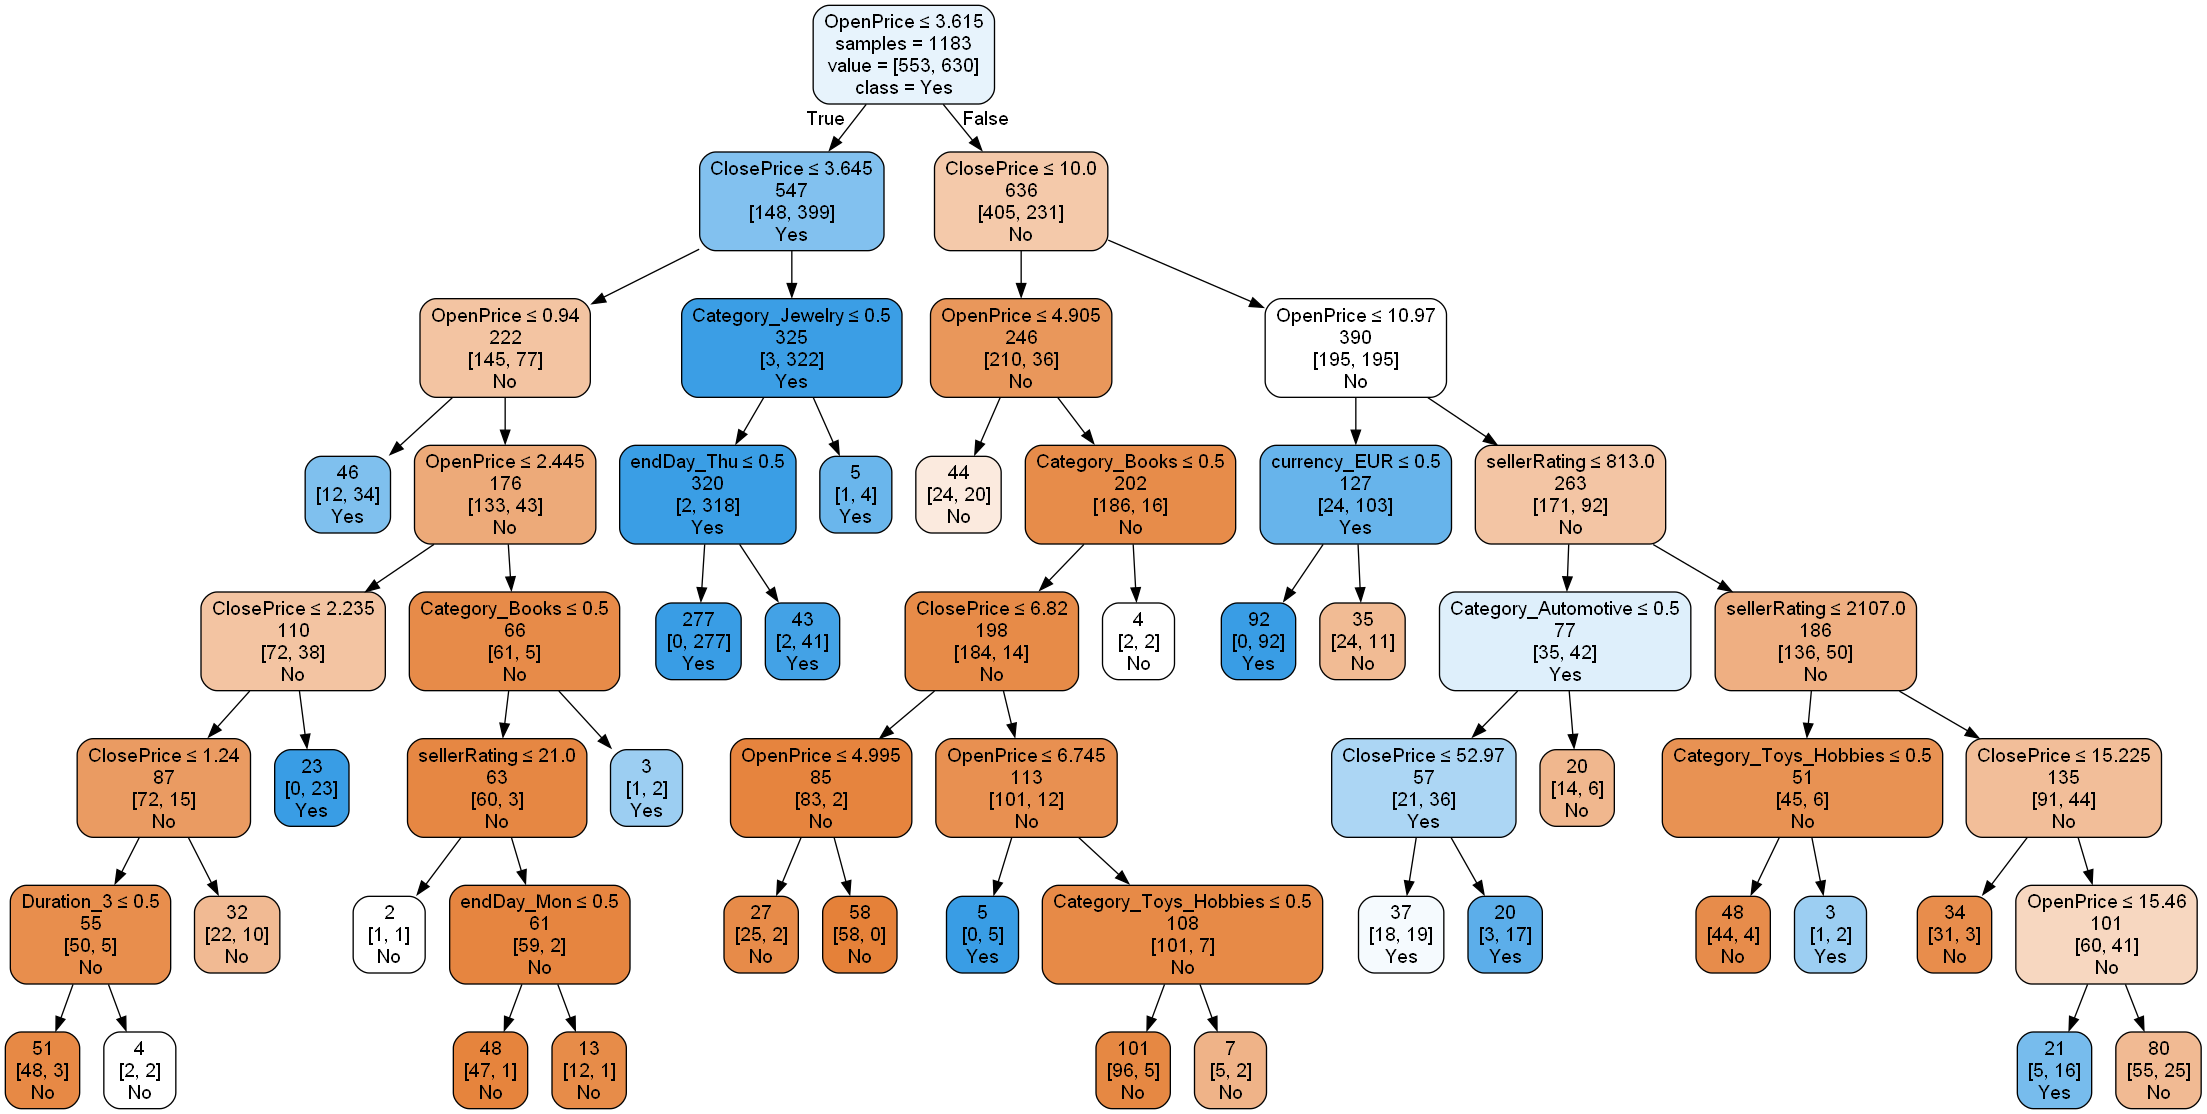

In [15]:
print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=X_train.columns, class_names=classTree.classes_)

## 9.1.a Printed results in terms of rules.

In [16]:
print(export_text(classTree,feature_names=X_train.columns.to_list(),show_weights=True))

|--- OpenPrice <= 3.62
|   |--- ClosePrice <= 3.64
|   |   |--- OpenPrice <= 0.94
|   |   |   |--- weights: [12.00, 34.00] class: Yes
|   |   |--- OpenPrice >  0.94
|   |   |   |--- OpenPrice <= 2.45
|   |   |   |   |--- ClosePrice <= 2.24
|   |   |   |   |   |--- ClosePrice <= 1.24
|   |   |   |   |   |   |--- Duration_3 <= 0.50
|   |   |   |   |   |   |   |--- weights: [48.00, 3.00] class: No
|   |   |   |   |   |   |--- Duration_3 >  0.50
|   |   |   |   |   |   |   |--- weights: [2.00, 2.00] class: No
|   |   |   |   |   |--- ClosePrice >  1.24
|   |   |   |   |   |   |--- weights: [22.00, 10.00] class: No
|   |   |   |   |--- ClosePrice >  2.24
|   |   |   |   |   |--- weights: [0.00, 23.00] class: Yes
|   |   |   |--- OpenPrice >  2.45
|   |   |   |   |--- Category_Books <= 0.50
|   |   |   |   |   |--- sellerRating <= 21.00
|   |   |   |   |   |   |--- weights: [1.00, 1.00] class: No
|   |   |   |   |   |--- sellerRating >  21.00
|   |   |   |   |   |   |--- endDay_Mon <= 0.50
|

## 9.1.b No, this model is not practical for predicting the outcome of a new auction. You cannot predict the closing price of an auction before it has closed. You may be able to use Opening Price in conjunction with seller rating to place the closing price. In relationship to if an auction is competitive, I would say no at current interpretation.

## 9.1.c Interesting and Uninteresting Information:
#### Interesting: The ClosePrice value being high corresponds with OpenPrice being high when the seller rating is low. Seen in the right hand tree.
#### Uninteresting: Bids that close on Friday have definitively lower competitive probability.
###### To be honest, this question is hard to interpret.

## 9.1.d Preparing the data again.

In [17]:
drops = ['ClosePrice']

In [18]:
X_eBay = dfeBay.drop(columns=outcome).drop(columns=drops)
Y_eBay = dfeBay[outcome]
X_train, X_valid, y_train, y_valid = train_test_split(X_eBay, Y_eBay, test_size=0.4, random_state=1)

In [19]:
classTree = DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=7, min_samples_split=50)
classTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=1)

## 9.1.d Printed Tree

Classes: No, Yes


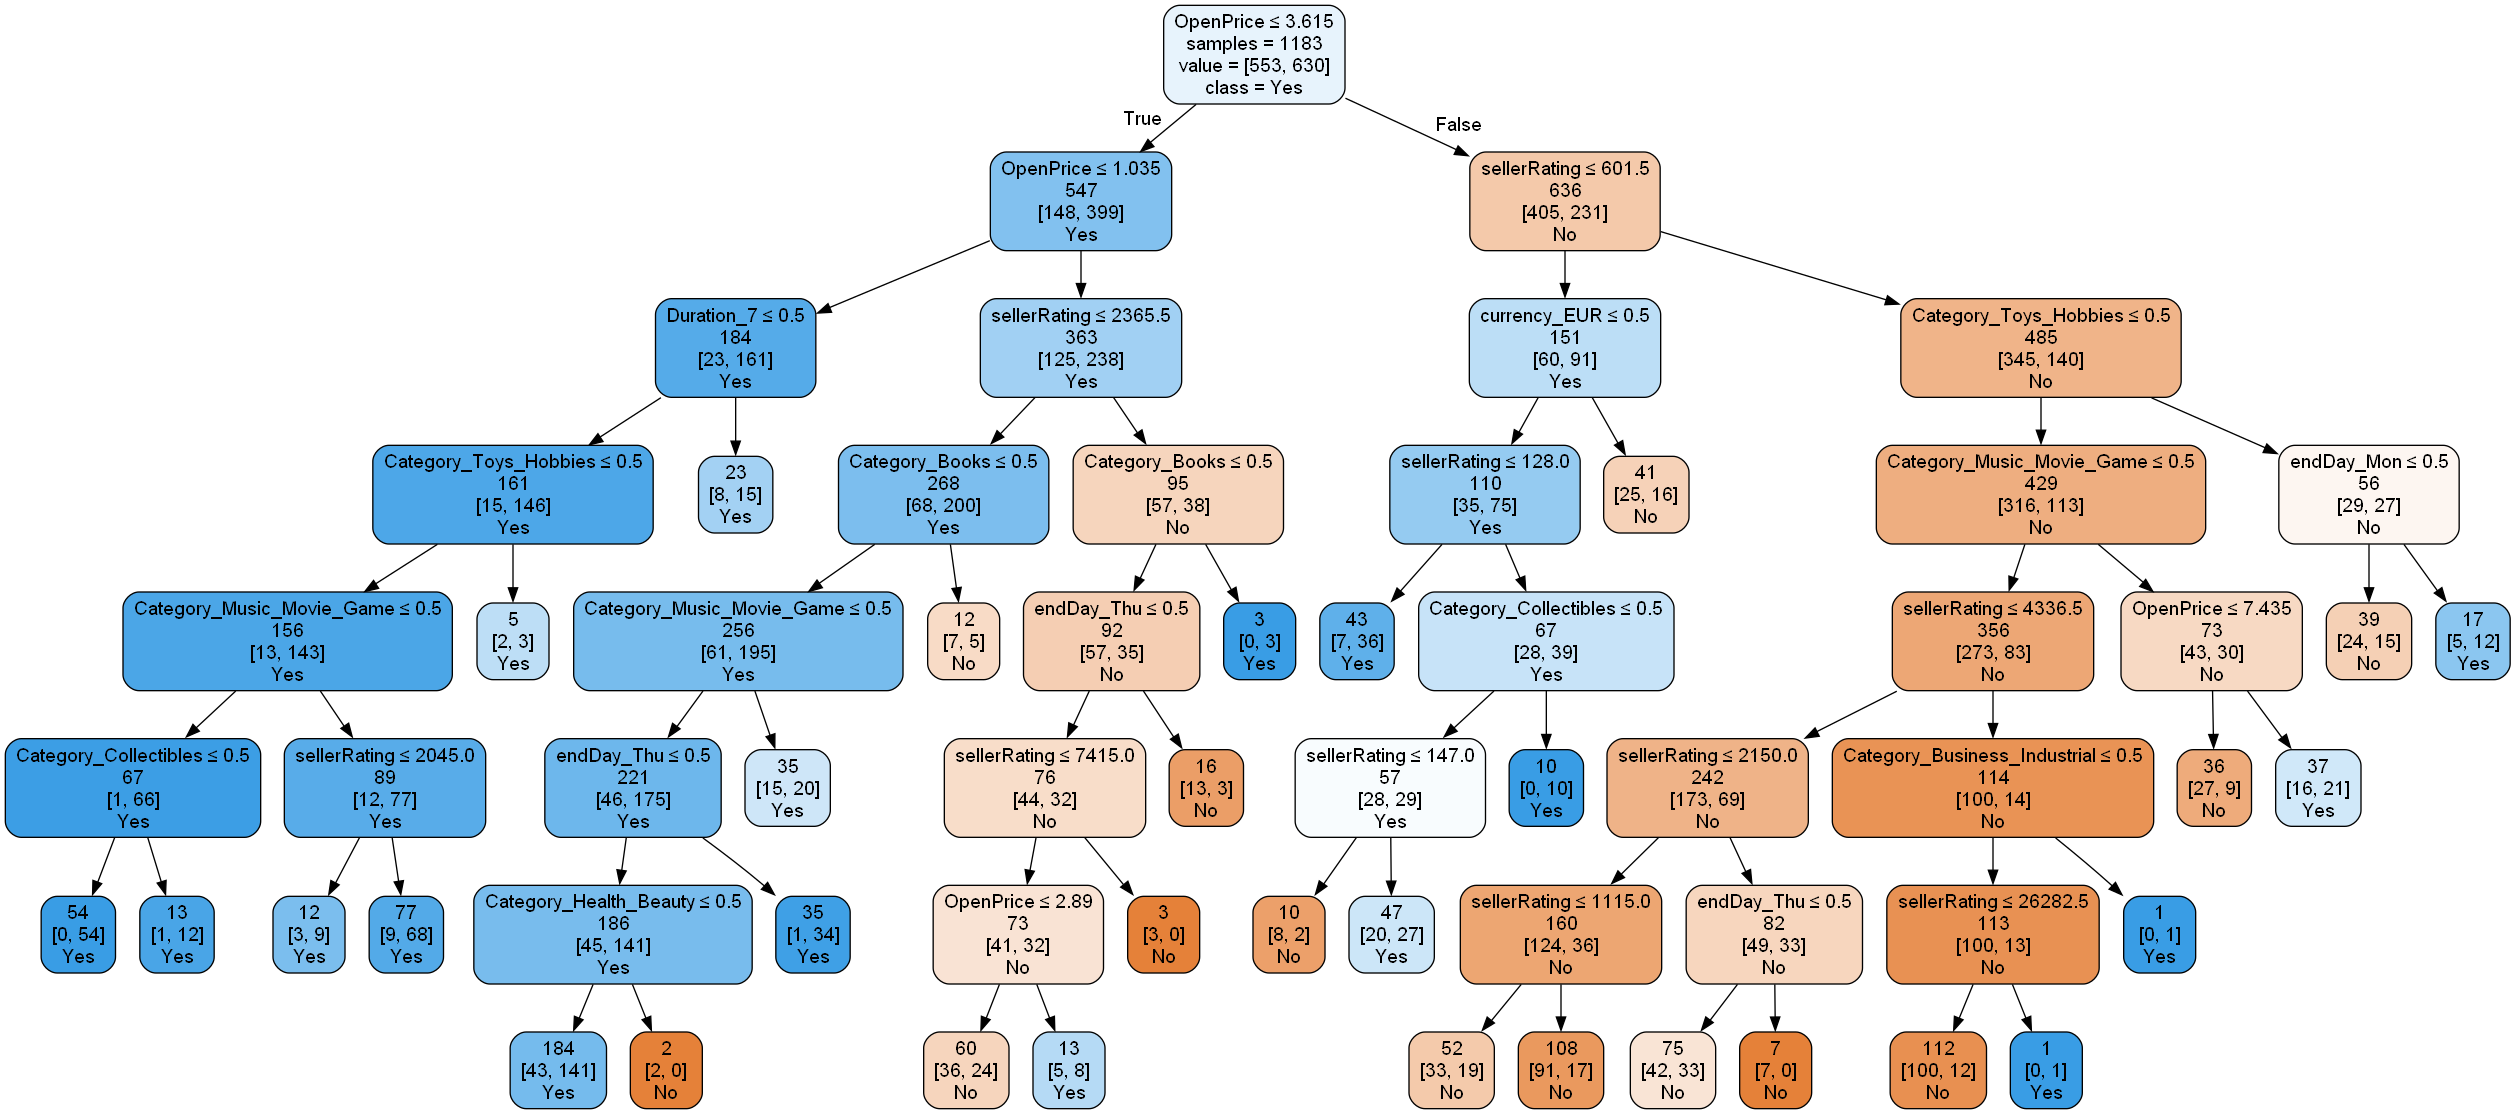

In [20]:
print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=X_train.columns, class_names=classTree.classes_)

## 9.1.d Printed results in terms of rules.

In [21]:
print(export_text(classTree,feature_names=X_train.columns.to_list(),show_weights=True))

|--- OpenPrice <= 3.62
|   |--- OpenPrice <= 1.04
|   |   |--- Duration_7 <= 0.50
|   |   |   |--- Category_Toys_Hobbies <= 0.50
|   |   |   |   |--- Category_Music_Movie_Game <= 0.50
|   |   |   |   |   |--- Category_Collectibles <= 0.50
|   |   |   |   |   |   |--- weights: [0.00, 54.00] class: Yes
|   |   |   |   |   |--- Category_Collectibles >  0.50
|   |   |   |   |   |   |--- weights: [1.00, 12.00] class: Yes
|   |   |   |   |--- Category_Music_Movie_Game >  0.50
|   |   |   |   |   |--- sellerRating <= 2045.00
|   |   |   |   |   |   |--- weights: [3.00, 9.00] class: Yes
|   |   |   |   |   |--- sellerRating >  2045.00
|   |   |   |   |   |   |--- weights: [9.00, 68.00] class: Yes
|   |   |   |--- Category_Toys_Hobbies >  0.50
|   |   |   |   |--- weights: [2.00, 3.00] class: Yes
|   |   |--- Duration_7 >  0.50
|   |   |   |--- weights: [8.00, 15.00] class: Yes
|   |--- OpenPrice >  1.04
|   |   |--- sellerRating <= 2365.50
|   |   |   |--- Category_Books <= 0.50
|   |   |   | 

## 9.1.e
#### Below I choose the x line value of 6000 and a y line value of 210 because they create a nice optimal range for predicting Competitive 'Yes' or 'No' by simple virtue of being on just the outside of both value clusters. It splits the two classes quite well. While the Y value does lose a few of the largest Competitive listings, overall the loss by predicting the rest should be worth it.

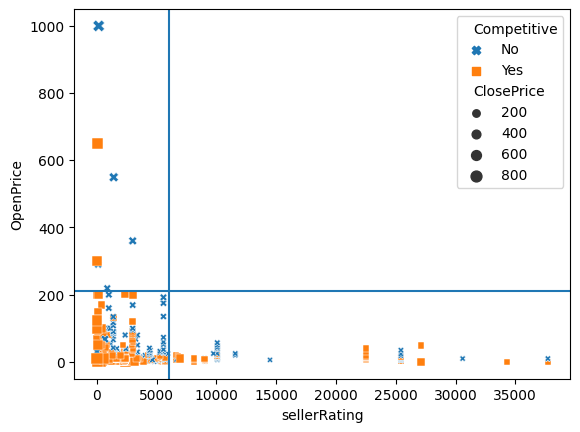

In [22]:
markers = {"Yes": "s", "No": "X"}
sns.scatterplot(data=dfeBay, x="sellerRating", y="OpenPrice", hue="Competitive", style="Competitive", size="ClosePrice", markers=markers)
plt.axvline(x=6000)
plt.axhline(y=210)

## 9.1.f

In [23]:
classTree = DecisionTreeClassifier(criterion="gini", random_state=1)
classTree.fit(X_train, y_train)
classificationSummary(y_train, classTree.predict(X_train))
print('')
print('')
classificationSummary(y_valid, classTree.predict(X_valid))

Confusion Matrix (Accuracy 0.9239)

       Prediction
Actual   0   1
     0 518  35
     1  55 575


Confusion Matrix (Accuracy 0.7047)

       Prediction
Actual   0   1
     0 248 105
     1 128 308


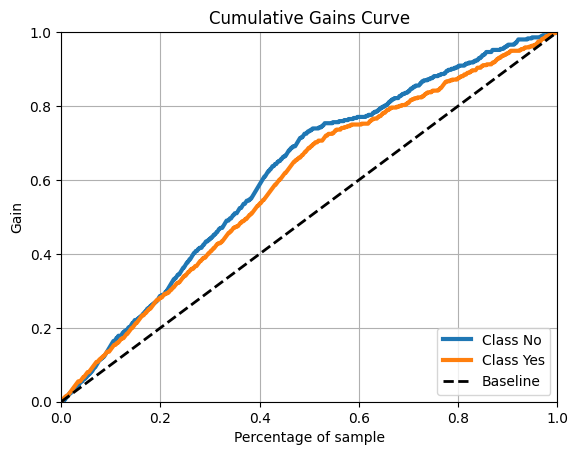

In [24]:
predicted_probas = classTree.predict_proba(X_valid)
skplt.metrics.plot_cumulative_gain(y_valid, predicted_probas)
plt.show()

In [25]:
df_predicted_probas = pd.DataFrame(predicted_probas)
df_predicted_probas['Predicted'] = df_predicted_probas[1]
df_predicted_probas = df_predicted_probas.drop(columns=[0,1])

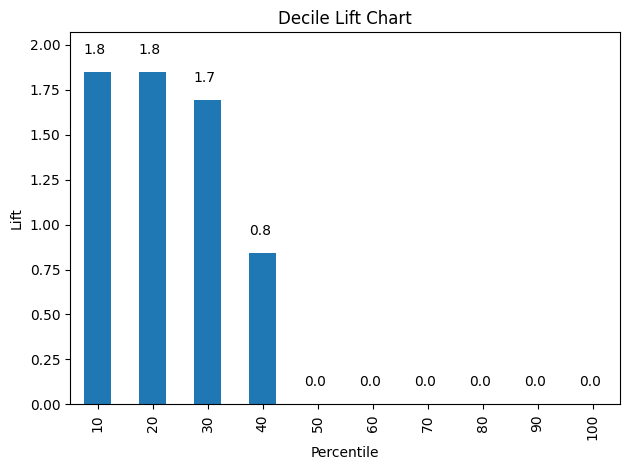

In [26]:
resultPredTrain = pd.DataFrame({'Predicted': df_predicted_probas['Predicted'], 'Actual': y_valid})
liftChart(resultPredTrain.sort_values(by=['Predicted'], ascending=False).Predicted, labelBars=True, title='Decile Lift Chart')
plt.tight_layout()
plt.show()

## 9.1.f The predictive performance of this model is incredibly high.

## 9.1.g I would recommend to any seller four avenues of approach.
#### Avenue 1: If item is cheap, keep your duration short. Artificially increasing the "excitement" for purchasing an item is always applicable but it especially applies to cheaper items. People are most susceptible to marketing while they are in the initial "seeking" phase. If you can coerce them into believing the item has a time limited offer, they are more likely to bid.
#### Avenue 2: If your item is not "cheap" and your seller rating is lower than 2400, try to end your bidding days on Thursday, keeping your bid open for 7 days. This will ensure a high probability of multiple bids.
#### Avenue 3: If you have a low seller rating, try selling your item in Europe.
#### Avenue 4: If Selling Business Industrial products, keep a higher (26000) rating. Most businesses do not want to purchase from smaller, newer entities.